In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [3]:

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\U\Downloads\brain tumour detection\datasets\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"C:\Users\U\Downloads\brain tumour detection\datasets\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(2848, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(2848,2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [10]:
y_train.shape

(2278, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
57/57 [==============================] - 81s 1s/step - loss: 12.2483 - val_loss: 3.5701
Epoch 2/30
57/57 [==============================] - 75s 1s/step - loss: 1.1946 - val_loss: 0.7576
Epoch 3/30
57/57 [==============================] - 79s 1s/step - loss: 0.7554 - val_loss: 0.7903
Epoch 4/30
57/57 [==============================] - 79s 1s/step - loss: 0.7386 - val_loss: 0.8038
Epoch 5/30
57/57 [==============================] - 78s 1s/step - loss: 0.7121 - val_loss: 0.7921
Epoch 6/30
57/57 [==============================] - 78s 1s/step - loss: 0.7044 - val_loss: 0.8271
Epoch 7/30
57/57 [==============================] - 79s 1s/step - loss: 0.7013 - val_loss: 0.8362
Epoch 8/30
57/57 [==============================] - 79s 1s/step - loss: 0.6939 - val_loss: 0.8362
Epoch 9/30
57/57 [==============================] - 80s 1s/step - loss: 0.6933 - val_loss: 0.8373
Epoch 10/30
57/57 [==============================] - 80s 1s/step - loss: 0.6976 - val_loss: 0.8399
Epoch 11/30
57/57 

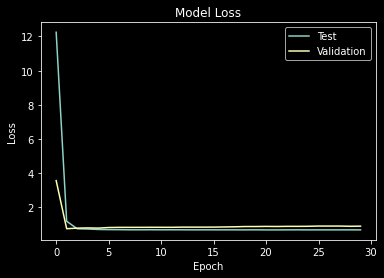

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [13]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

50.09170174598694% Confidence This Is Its a Tumor


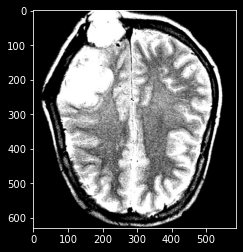

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\U\Downloads\brain tumour detection\datasets\yes\y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

56.31890296936035% Confidence This Is A No, Its not a tumor


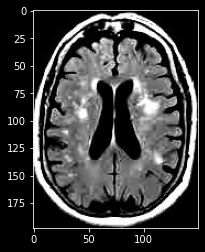

In [40]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\U\Downloads\brain tumour detection\datasets\no\no1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))